# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

In [4]:
#path dove si trova il dataframe e il file degli split
path = "C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto"

##### Per ogni categoria di azioni del dataset viene estratto casualmente un video e catturato un frame

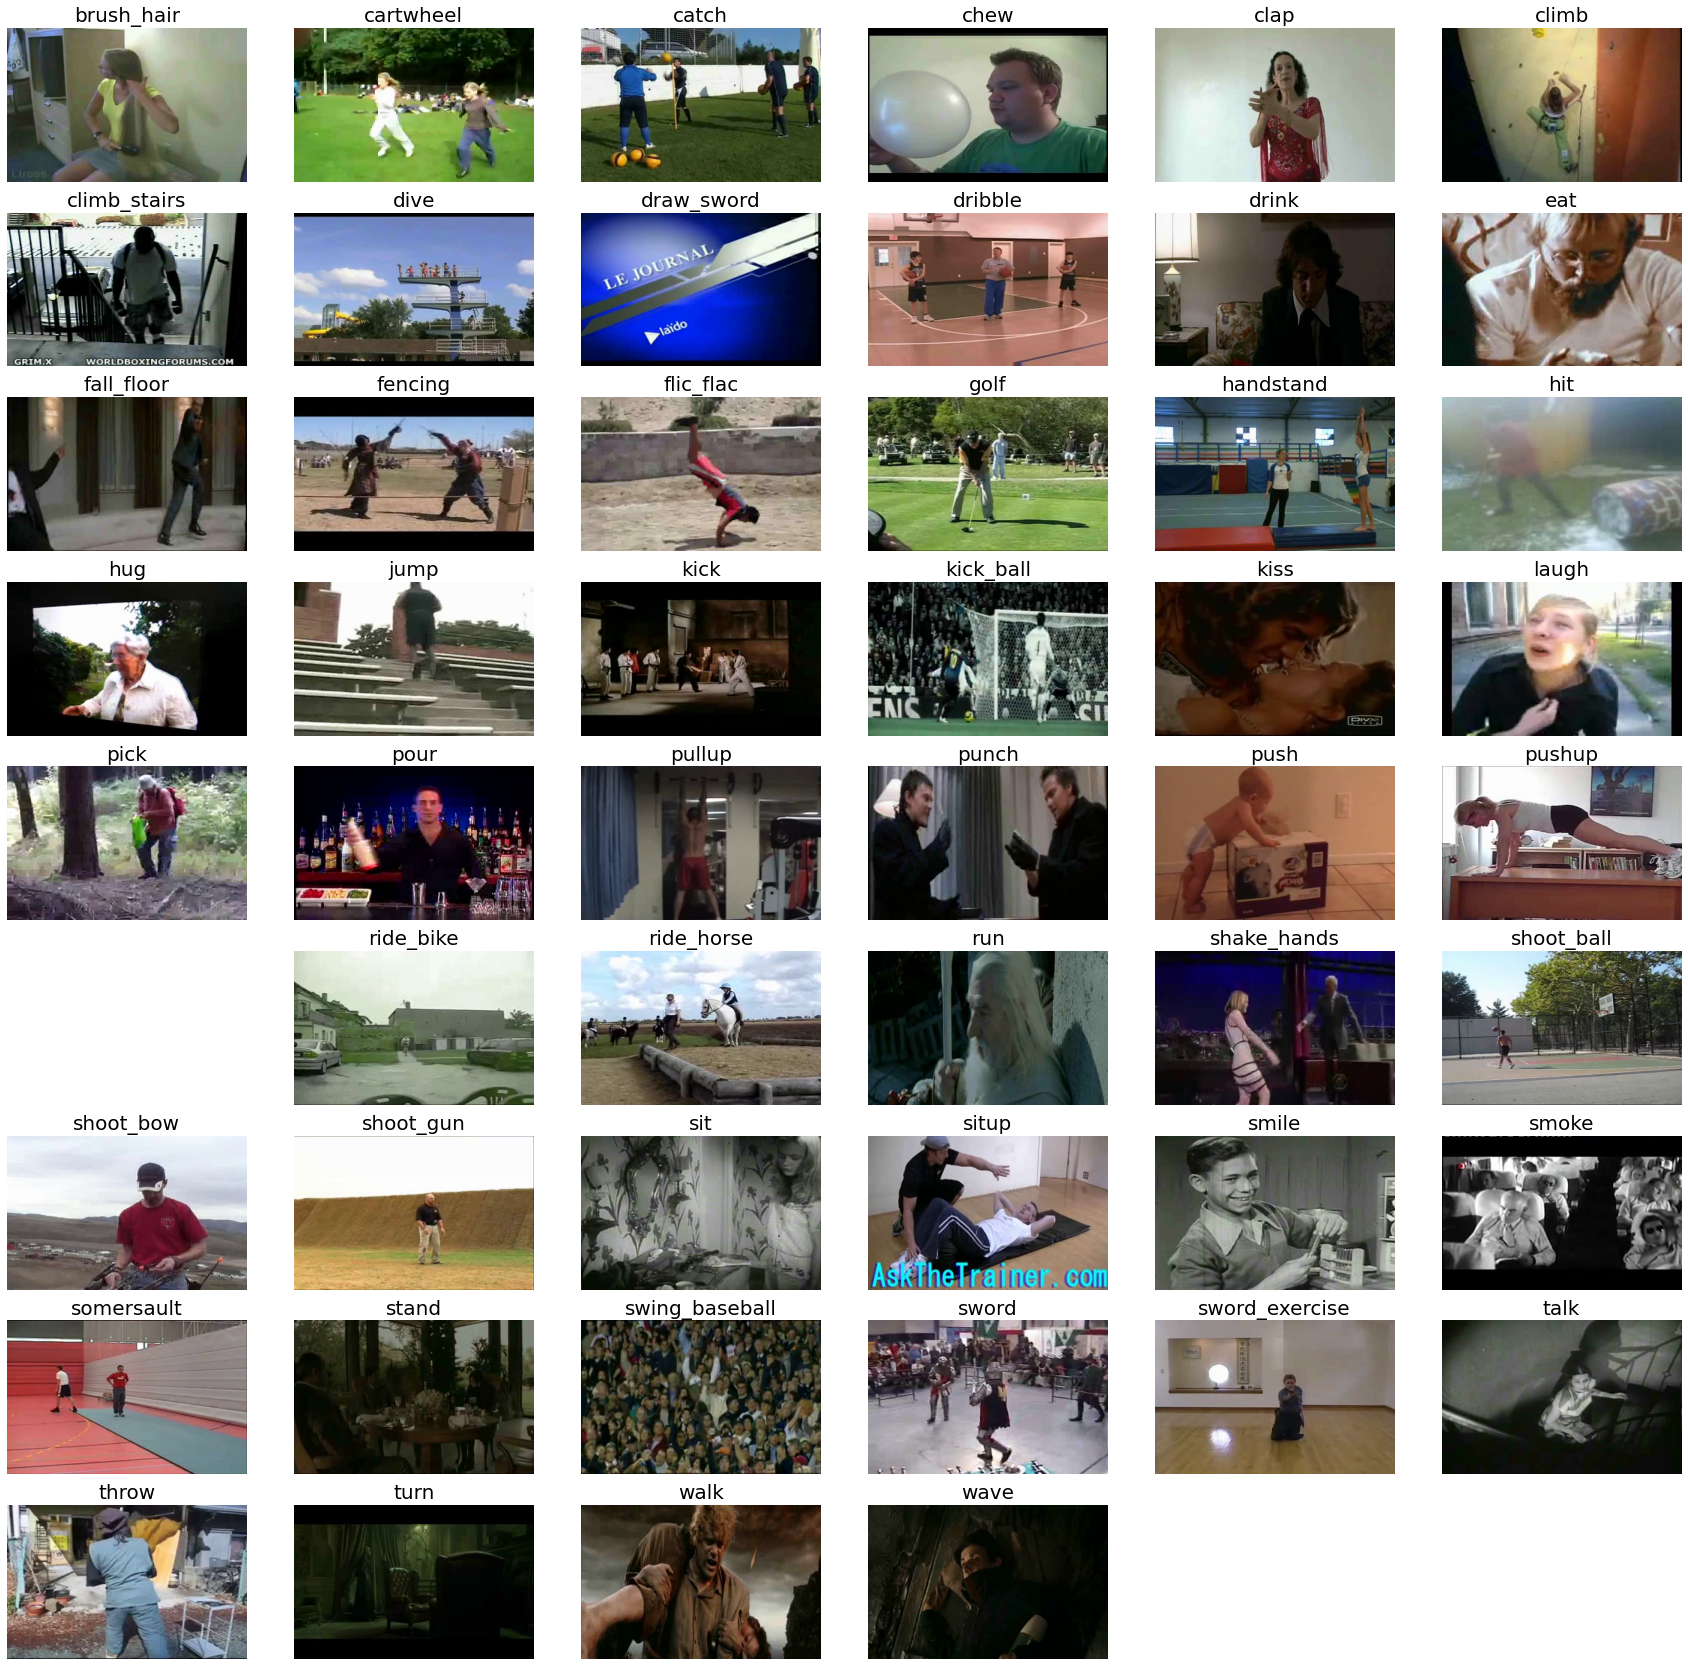

In [74]:
plt.figure(figsize=(30,30))
actions = os.listdir(f"{path}/hmdb51")    #va estratto il dataset dal file zippato
counter = 0
for action in actions:
    counter += 1
    list_videos_action = os.listdir(f"{path}/hmdb51/{action}")    #tutti i video di quell'azione
    if (action != "video") and (action != "rawframes"):  
        selected_video = random.choice(list_videos_action)
        video_reader = cv2.VideoCapture(f"{path}/hmdb51/{action}/{selected_video}")
        ret, gbrframe = video_reader.read()
        video_reader.release()
        rgb_frame = cv2.cvtColor(gbrframe, cv2.COLOR_BGR2RGB)    #converto immagine da BGR a RGB
        plt.subplot(9,6,counter);plt.imshow(rgb_frame, aspect = "auto");plt.axis("off")
        plt.title(action, fontsize = 20)

##### Creo dataframes contenenti le informazioni di quali video usare come training/test

In [6]:
def split_to_df(split):
    df = pd.DataFrame(columns=['action', 'title', 'train/test'])
    for action in actions:
        with open(f"{path}/testTrainMulti_7030_splits/{action}_test_{split}.txt") as f:
            informations = f.readlines()       
        for info in informations:   #per ogni video della lista dei video di una data azione
            df.loc[len(df)] = action, info.split()[0], int(info.split()[1])
    return df

In [7]:
split1 = split_to_df("split1")
split2 = split_to_df("split2")
split3 = split_to_df("split3")

In [9]:
split1.head(10)

,action,title,train/test
0,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,1
1,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,1
2,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,1
3,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,0
4,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
5,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
6,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
7,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
8,brush_hair,Aussie_Brunette_Brushing_Long_Hair_brush_hair_...,2
9,brush_hair,Aussie_Brunette_Brushing_Long_Hair_brush_hair_...,2


##### Dimensioni video


In [108]:
dimensions = dict()
for action in actions:
    print("sono ad azione: ", action, end="\r")
    for video in os.listdir(f"{path}/hmdb51/{action}"): 
        if split1[split1["title"] == video]["train/test"].item() != 0:
            video_reader = cv2.VideoCapture(f'{path}/hmdb51/{action}/{video}')
            larghezza  = video_reader.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
            video_reader.release()
            if larghezza not in dimensions:
                dimensions[larghezza] = 1
            else:
                dimensions[larghezza] += 1

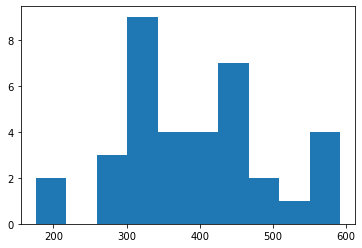

In [105]:
plt.hist (dimensions)
plt.show()

## Categories exploration

In [2]:
dataset_directory = '.\dataset\Hmdb51_org_extracted'

In [3]:
completelist = [os.path.join(path, name) for path, subdirs, files in os.walk(dataset_directory) for name in files]
print("Number of files:", len(completelist))

Number of files: 6766


In [4]:
cat_list = os.listdir(os.path.join(dataset_directory))
print("Number of categories:", len(cat_list))

Number of categories: 51


In [5]:
file_name_list = []
cat_list_rep = []

for cat in cat_list:
    path = os.path.join(dataset_directory, cat)
    for loc, subdirs, files in os.walk(path):
        for file in files:
            file_name_list.append(file)
            cat_list_rep.append(cat)

In [6]:
file_df = pd.DataFrame(list(zip(file_name_list, cat_list_rep)), columns = ['file_name','activity'])
file_df

,file_name,activity
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair
3,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair
4,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair
...,...,...
6761,winKen_wave_u_cm_np1_ba_bad_0.avi,wave
6762,winKen_wave_u_cm_np1_ri_bad_1.avi,wave
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave


In [7]:
def title_properties(string, category):
    match = re.findall(f'(\S+){category}(\S+)', string)[-1]
    return(match)

In [8]:
file_df['title'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[0], axis=1)
file_df['properties'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[1], axis=1)
file_df

,file_name,activity,title,properties
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_0.avi
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_1.avi
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_2.avi
3,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair,atempting_to_brush_my_hair_,_u_nm_np2_le_goo_0.avi
4,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair,atempting_to_brush_my_hair_,_u_nm_np2_le_goo_1.avi
...,...,...,...,...
6761,winKen_wave_u_cm_np1_ba_bad_0.avi,wave,winKen_,_u_cm_np1_ba_bad_0.avi
6762,winKen_wave_u_cm_np1_ri_bad_1.avi,wave,winKen_,_u_cm_np1_ri_bad_1.avi
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,_u_cm_np1_fr_med_0.avi
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,_u_cm_np1_fr_med_1.avi


In [9]:
def separate_properties(string):
    match = re.match('_(\w+)_(\w+)_(\w+)_(\w+)_(\w+)_(\d+).avi', string)
    return(match)

In [33]:
file_df['visible_body_parts'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[1], axis=1)
file_df['camera_motion'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[2], axis=1)
file_df['number_of_people'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[3], axis=1)
file_df['camera_viewpoint'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[4], axis=1)
file_df['video_quality'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[5], axis=1)
file_df['video_number'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[6], axis=1)

In [34]:
file_df_complete = file_df[['title', 'video_number', 'activity', 'visible_body_parts', 'camera_motion', 'number_of_people', 'camera_viewpoint', 'video_quality']]
file_df_complete = file_df_complete.astype({'video_number': int})
file_df_complete

,title,video_number,activity,visible_body_parts,camera_motion,number_of_people,camera_viewpoint,video_quality
0,April_09_,0,brush_hair,u,nm,np1,ba,goo
1,April_09_,1,brush_hair,u,nm,np1,ba,goo
2,April_09_,2,brush_hair,u,nm,np1,ba,goo
3,atempting_to_brush_my_hair_,0,brush_hair,u,nm,np2,le,goo
4,atempting_to_brush_my_hair_,1,brush_hair,u,nm,np2,le,goo
...,...,...,...,...,...,...,...,...
6761,winKen_,0,wave,u,cm,np1,ba,bad
6762,winKen_,1,wave,u,cm,np1,ri,bad
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,0,wave,u,cm,np1,fr,med
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,1,wave,u,cm,np1,fr,med


In [38]:
print("Number of individual videos:", len(file_df_complete.groupby('title').count()))

Number of individual videos: 1407


In [40]:
sns.barplot(file_df_complete['camera_motion'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

## Video details exploration

In [16]:
hmdb51_train = hub.load("hub://activeloop/hmdb51-train")
#hmdb51_test = hub.load("hub://activeloop/hmdb51-test")
hmdb51_train

hub://activeloop/hmdb51-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/hmdb51-train


Dataset(path='hub://activeloop/hmdb51-train', read_only=True, tensors=['visible_body_parts', 'camera_motion', 'camera_viewpoint', 'number_of_people', 'video_quality', 'labels', 'videos'])

In [29]:
#!pip install torchvision

In [13]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torch.optim.lr_scheduler import StepLR
import torchvision
from torchvision import get_video_backend
from torchvision.models.video import r3d_18 
from torchvision import transforms

ModuleNotFoundError: No module named 'torch'

In [28]:
hmdb51_training = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=data, num_workers=num_workers)
batch_size=32
data_loader = DataLoader(hmdb51_training, batch_size=batch_size, shuffle=True, **kwargs)

TypeError: __init__() missing 3 required positional arguments: 'root', 'annotation_path', and 'frames_per_clip'

### Estrazione frame 

In [58]:
import tensorflow as tf
from tensorflow import keras

In [9]:
for parola in ["rawframes", "videos"]:
    newpath = f'{path}/hmdb51/{parola}' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)

In [24]:
for parola in ["train", "test"]:
    newpath = f'{path}/hmdb51/rawframes/{parola}' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)
for action in actions: 
    for parola in ["train", "test"]:
        newpath = f'{path}/hmdb51/rawframes/{parola}/{action}' 
        if not os.path.exists(newpath):
            os.makedirs(newpath)
    list_videos_action = os.listdir(f"{path}/hmdb51/{action}")
    n_video = len(list_videos_action)
    counter_n_video = 0
    for video in list_videos_action:
        if split1[split1["title"] == video]["train/test"].item() == 0:
            continue
        elif split1[split1["title"] == video]["train/test"].item() == 1:
            newpath = f'{path}/hmdb51/rawframes/train/{action}/{video}'
            if not os.path.exists(newpath):
                os.makedirs(newpath)
        else:
            newpath = f'{path}/hmdb51/rawframes/test/{action}/{video}'
            if not os.path.exists(newpath):
                os.makedirs(newpath)
        counter_n_video += 1
        video_reader = cv2.VideoCapture(f"{path}/hmdb51/{action}/{video}")
        ret, frame = video_reader.read()
        count_frame = 1
        while ret:
            cv2.imwrite(os.path.join(f'{newpath}' , f'{video}_frame_{count_frame}.jpg'), frame)
            cv2.waitKey(0)
            for i in range(4):          #leggo un frame ogni 4 
                ret, frame = video_reader.read()
            if not ret:
                break
            print(f'Action: {action}, video letti: {counter_n_video} su {n_video}', end = "\r")
            count_frame += 4

#### Resize

In [55]:
for set_ in ["train", "test"]:
    for action in actions:
        newpath = f'{path}/hmdb51/rawframes/{set_}/{action}'
        list_videos_action = os.listdir(newpath)
        for video in list_videos_action:
            print(f"azione: {action}, video: {video}", end = "\r")
            frames = os.listdir(f"{newpath}/{video}")
            for frame in frames:
                immagine = cv2.imread(f"{newpath}/{video}/{frame}")
                immagine = cv2.resize(immagine, (224,224))
                cv2.imwrite(f"{newpath}/{video}/{frame}", immagine)
        

### CNN ALE   (ancora da fare, è una bozza)

In [ ]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
t0 = time()
# Transfer zip dataset to the current virtual machine
copyfile('gdrive/My Drive/catvsdog.zip', 'catvsdog.zip')
# Extract files
zip = zipfile.ZipFile('catvsdog.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

In [64]:
train_dataset = keras.preprocessing.image_dataset_from_directory(f'{path}/hmdb51/rawframes/train',
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            seed=1)

Found 71938 files belonging to 51 classes.


In [65]:
val_dataset = keras.preprocessing.image_dataset_from_directory(f'{path}/hmdb51/rawframes/test',
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            seed=1)

Found 30002 files belonging to 51 classes.


In [59]:
num_classes = 51

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 3, input_shape=(224, 224, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(256, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.GlobalMaxPooling2D())

model.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [68]:
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], 
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

In [70]:
history = model.fit(train_dataset,  epochs=5, 
                    validation_data=val_dataset)

Epoch 1/5
 132/2249 [>.............................] - ETA: 1:25:18 - loss: 3.8395 - accuracy: 0.1922

KeyboardInterrupt: 

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
model(x, training=False)

### Prof

In [70]:
num_classes = 51

# Architecture definition v5
inputs = keras.Input((224,224,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net = keras.Model(inputs, outputs)

In [66]:
# Compile the model for training
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

NameError: name 'net' is not defined

In [ ]:
# Model training (v5)
history = net.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
            callbacks=[callback]);

In [72]:
net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation_4 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        1849